In [1]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research']


In [3]:
with open('all_price2.pickle','rb') as f:
    results = pickle.load(f)

In [4]:
len(results)

2115

In [5]:
results['Abyssal_whip'].keys()

dict_keys(['endMAE', 'startLoss', 'opt_params', 'perfect', 'momentum_model', 'model_opt', 'sma', 'testPrices', 'buyAndHold', 'numPrices', 'item', 'startMAE', 'numEpochs', 'budget', 'model', 'stochOscil_model', 'stochOscil', 'opt_days', 'predictions', 'persist', 'sma_model', 'momentum', 'model_days', 'endLoss'])

In [6]:
mae = [results[item]['endMAE'] for item in results]
maeChange = [results[item]['startMAE']-results[item]['endMAE'] for item in results]

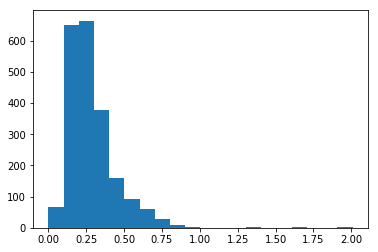

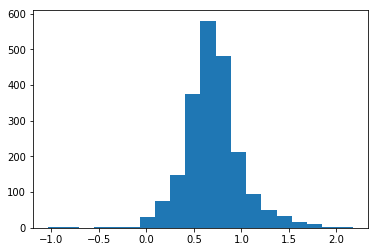

In [7]:
plt.hist(mae,20)
plt.show()
plt.hist(maeChange,20)
plt.show()

In [8]:
maeChange = [(item,results[item]['startMAE']-results[item]['endMAE']) for item in results]
maeChange = sorted(maeArr, key=lambda x: x[1], reverse=True)

NameError: name 'maeArr' is not defined

In [ ]:
print(maeChange[:100])

In [ ]:
print(maeChange[-100:])

In [ ]:
prices = [items.getPrices(item)[-1] for item in results]
variance = [np.var(results[item]['testPrices']) for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [ ]:
print('price,mae',np.corrcoef(prices,mae)[0][1])
print('bl,price',np.corrcoef(buylimits,mae)[0][1])
print('prof,pers',np.corrcoef(mae,pers)[0][1])
print('mae,perf',np.corrcoef(mae,perf)[0][1])
print('mae,bah',np.corrcoef(mae,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('variance,mae',np.corrcoef(variance,mae)[0][1])